---

# **Universidad de las Fuerzas Armadas ESPE**
### **Integrantes:**                        
*   Marcelo Acuña
*   Abner Arboleda
*   Fernando Sandoval
### **NRC:** 29769
### **Fecha:** 12/01/2026

### **ANÁLISIS DE CLUSTERING: K-MEANS Y K-PROTOTYPES**
### **Dataset: Marketing Campaign**

## 1. INTRODUCCIÓN Y PLANTEAMIENTO DEL PROBLEMA

### ¿Qué es el Clustering y por qué es importante?

El **clustering** es una técnica de aprendizaje no supervisado que agrupa datos en conjuntos (clusters) basándose en similitudes. A diferencia de la clasificación supervisada, no se requiere una variable objetivo predefinida.

### Algoritmos a Implementar

1. **K-Means:** Algoritmo de clustering para datos numéricos. Minimiza la varianza dentro de cada cluster.
2. **K-Prototypes:** Extensión de K-Means que permite trabajar con datos mixtos (numéricos y categóricos).

### Objetivo del Proyecto

1. Preprocesar el dataset de Marketing Campaign
2. Aplicar K-Means para segmentar clientes basándose en variables numéricas
3. Aplicar K-Prototypes para incluir variables categóricas en la segmentación
4. Evaluar la calidad de los clusters usando métricas como Silhouette Score
5. Determinar el número óptimo de clusters usando el método del codo

## 2. DESCRIPCIÓN DEL DATASET

### Contexto del Dataset

El **Marketing Campaign Dataset** contiene información de clientes de una empresa de retail que vende productos como vinos, frutas, carnes, pescados, dulces y productos de oro. El objetivo original del dataset era predecir la respuesta de los clientes a una campaña de marketing, pero en este análisis **eliminaremos la variable objetivo (Response)** que indicaba si el cliente respondió a una campaña de marketing, para realizar un análisis de clustering no supervisado.

### ¿Para qué sirve este análisis?

La segmentación de clientes permite:
- **Personalizar campañas de marketing** dirigidas a cada segmento
- **Identificar clientes de alto valor** para estrategias de fidelización
- **Optimizar recursos** enfocándose en los segmentos más rentables
- **Descubrir patrones ocultos** en el comportamiento de compra

### Información del Dataset

- **Fuente:** Kaggle - Marketing Campaign Dataset
- **Registros:** 2,240 clientes
- **Variables:** 29 columnas

### Variables Principales:

| Variable | Tipo | Descripción |
|----------|------|-------------|
| **ID** | Numérica | Identificador único del cliente (a eliminar) |
| **Year_Birth** | Numérica | Año de nacimiento del cliente |
| **Education** | Categórica | Nivel educativo: Graduation, PhD, Master, 2n Cycle, Basic |
| **Marital_Status** | Categórica | Estado civil: Single, Married, Together, Divorced, Widow, etc. |
| **Income** | Numérica | Ingreso anual del hogar (tiene valores faltantes) |
| **Kidhome** | Numérica | Número de niños en el hogar |
| **Teenhome** | Numérica | Número de adolescentes en el hogar |
| **Dt_Customer** | Fecha | Fecha de registro como cliente |
| **Recency** | Numérica | Días desde la última compra |
| **MntWines, MntFruits, etc.** | Numérica | Gastos en diferentes categorías de productos |
| **NumDealsPurchases** | Numérica | Número de compras con descuento |
| **NumWebPurchases** | Numérica | Compras realizadas por web |
| **NumCatalogPurchases** | Numérica | Compras por catálogo |
| **NumStorePurchases** | Numérica | Compras en tienda física |
| **AcceptedCmp1-5** | Binaria | Si aceptó las campañas 1 a 5 |
| **Response** | Binaria | **Variable a eliminar** (era la variable objetivo) |
| **Z_CostContact, Z_Revenue** | Numérica | Variables constantes (a eliminar) |

---

## 3. IMPORTACIÓN DE LIBRERÍAS

Importamos todas las herramientas necesarias para el análisis, preprocesamiento, modelado y evaluación de clustering.

In [1]:
# ==============================================================================
# LIBRERÍAS PARA MANIPULACIÓN Y ANÁLISIS DE DATOS
# ==============================================================================
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# ==============================================================================
# LIBRERÍAS PARA VISUALIZACIÓN
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ==============================================================================
# LIBRERÍAS PARA CLUSTERING
# ==============================================================================
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# ==============================================================================
# LIBRERÍA PARA K-PROTOTYPES (datos mixtos)
# ==============================================================================
!pip install kmodes
from kmodes.kprototypes import KPrototypes

print("=" * 80)
print("TODAS LAS LIBRERÍAS IMPORTADAS CORRECTAMENTE")
print("=" * 80)
print(f"Pandas versión: {pd.__version__}")
print(f"NumPy versión: {np.__version__}")
print("Scikit-learn y kmodes disponibles para clustering")

TODAS LAS LIBRERÍAS IMPORTADAS CORRECTAMENTE
Pandas versión: 2.2.2
NumPy versión: 2.0.2
Scikit-learn y kmodes disponibles para clustering


---

## 4. CARGA DE DATOS

Cargamos el dataset de Marketing Campaign y realizamos una exploración inicial.

In [2]:
# Intentar usar Google Colab files.upload() si está disponible
try:
    from google.colab import files
    print("Por favor, selecciona el archivo 'marketing_campaign.csv' para subirlo.")
    uploaded = files.upload()
    print("\n✅ Archivo subido.")
except:
    print("ℹ No se detectó Google Colab. Usando método alternativo de carga.")
    print("\nPor favor, asegúrate de que el archivo 'marketing_campaign.csv' esté en el directorio actual.")
    print("O ingresa la ruta completa del archivo a continuación.")

    # Solicitar ruta del archivo
    file_path = input("\nRuta del archivo (Enter para usar 'marketing_campaign.csv'): ").strip()

    if not file_path:
        file_path = 'marketing_campaign.csv'

    # Remover comillas si las hay
    file_path = file_path.replace('"', '').replace("'", "")

Por favor, selecciona el archivo 'marketing_campaign.csv' para subirlo.


Saving marketing_campaign.csv to marketing_campaign.csv

✅ Archivo subido.


In [3]:
import os

file_path = 'marketing_campaign.csv'

if not os.path.exists(file_path):
    print("="*80)
    print(f" ERROR: El archivo '{file_path}' no se encontró en el directorio actual.")
    print("Por favor, sube el archivo o asegúrate de que esté en la ruta correcta.")
    print("="*80)
    df = None  # Asignar None a df para prevenir errores si el archivo no se encuentra
else:
    # Cargar el dataset
    # Intentar con tabulador primero, si falla probar con coma
    try:
        df = pd.read_csv(file_path, sep='\t')
        separador = "Tabulador (\\t)"
    except:
        df = pd.read_csv(file_path, sep=',')
        separador = "Coma (,)"

    print("="*80)
    print("DATASET CARGADO EXITOSAMENTE")
    print("="*80)
    print(f"\n Dimensiones del dataset: {df.shape[0]} registros x {df.shape[1]} columnas")
    print(f"\n Tamaño en memoria: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")
    print(f"\n Separador detectado: {separador}")

DATASET CARGADO EXITOSAMENTE

 Dimensiones del dataset: 2240 registros x 29 columnas

 Tamaño en memoria: 830.49 KB

 Separador detectado: Tabulador (\t)


In [4]:
# Información general del dataset
print("\n" + "=" * 80)
print("INFORMACIÓN GENERAL DEL DATASET")
print("=" * 80)
df.info()


INFORMACIÓN GENERAL DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDe

In [5]:
# Estadísticas descriptivas de variables numéricas
print("\n" + "=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print("=" * 80)
df.describe()


ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
# Estadísticas descriptivas de variables categóricas
print("\n" + "=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS")
print("=" * 80)
df.describe(include='object')


ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


---

## 5. ANÁLISIS EXPLORATORIO DE DATOS (EDA)

**Objetivos del EDA:**
- Identificar valores faltantes y estrategia de imputación
- Identificar y eliminar la variable objetivo (Response)
- Analizar distribución de variables
- Identificar outliers y datos inconsistentes

### 5.1 Análisis de Valores Faltantes

ANÁLISIS DE VALORES FALTANTES

 Columnas con valores faltantes:

Columna  Valores Faltantes  Porcentaje (%)
 Income                 24        1.071429


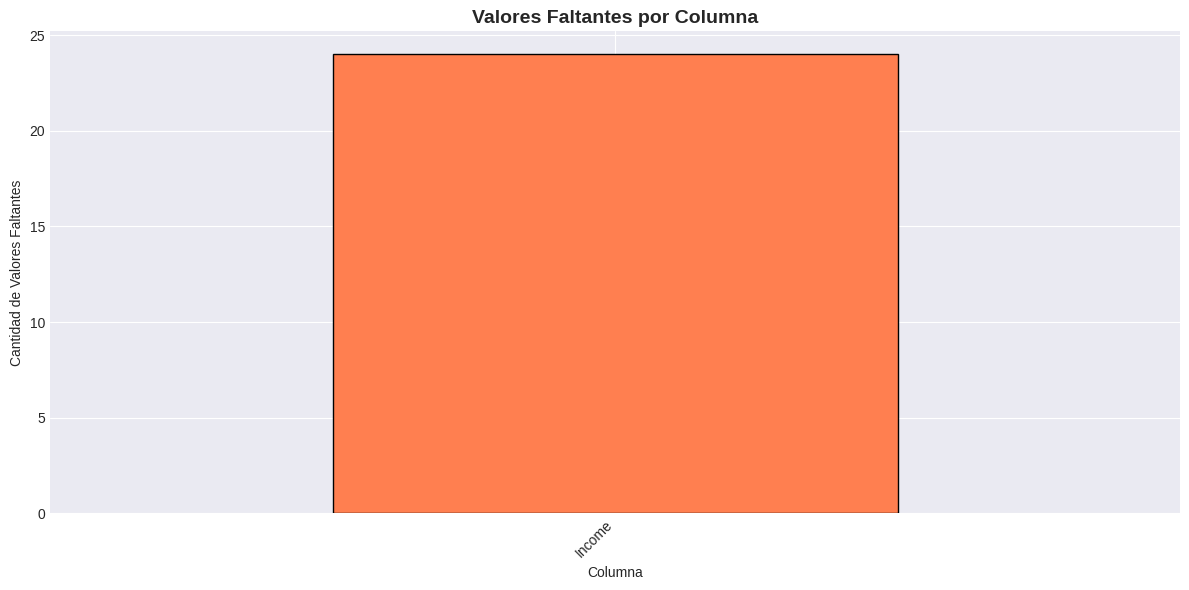

In [7]:
# Identificar valores faltantes en cada columna
print("=" * 80)
print("ANÁLISIS DE VALORES FALTANTES")
print("=" * 80)

valores_faltantes = df.isnull().sum()
porcentaje_faltantes = (df.isnull().sum() / len(df)) * 100

# Crear DataFrame con información de valores faltantes
resumen_faltantes = pd.DataFrame({
    'Columna': valores_faltantes.index,
    'Valores Faltantes': valores_faltantes.values,
    'Porcentaje (%)': porcentaje_faltantes.values
})

# Mostrar solo columnas con valores faltantes
resumen_faltantes_filtrado = resumen_faltantes[resumen_faltantes['Valores Faltantes'] > 0]

if len(resumen_faltantes_filtrado) > 0:
    print("\n Columnas con valores faltantes:\n")
    print(resumen_faltantes_filtrado.to_string(index=False))
else:
    print("\n No se encontraron valores faltantes (NaN) en el dataset")

# Visualización de valores faltantes
plt.figure(figsize=(12, 6))
valores_faltantes_sorted = valores_faltantes[valores_faltantes > 0].sort_values(ascending=False)
if len(valores_faltantes_sorted) > 0:
    valores_faltantes_sorted.plot(kind='bar', color='coral', edgecolor='black')
    plt.title('Valores Faltantes por Columna', fontsize=14, fontweight='bold')
    plt.xlabel('Columna')
    plt.ylabel('Cantidad de Valores Faltantes')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("\n No hay valores faltantes para visualizar")

### 5.2 Identificación de Variables Categóricas y Numéricas

In [8]:
# Identificar tipos de variables
print("=" * 80)
print("IDENTIFICACIÓN DE TIPOS DE VARIABLES")
print("=" * 80)

# Variables categóricas
vars_categoricas = df.select_dtypes(include=['object']).columns.tolist()
print(f"\n Variables Categóricas ({len(vars_categoricas)}):")
print(vars_categoricas)

# Variables numéricas
vars_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"\n Variables Numéricas ({len(vars_numericas)}):")
print(vars_numericas)

# Mostrar valores únicos de variables categóricas
print("\n" + "=" * 80)
print("VALORES ÚNICOS DE VARIABLES CATEGÓRICAS")
print("=" * 80)
for col in vars_categoricas:
    print(f"\n{col}: {df[col].unique()}")
    print(f"   Cantidad: {df[col].nunique()}")

IDENTIFICACIÓN DE TIPOS DE VARIABLES

 Variables Categóricas (3):
['Education', 'Marital_Status', 'Dt_Customer']

 Variables Numéricas (26):
['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

VALORES ÚNICOS DE VARIABLES CATEGÓRICAS

Education: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
   Cantidad: 5

Marital_Status: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
   Cantidad: 8

Dt_Customer: ['04-09-2012' '08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014'
 '09-09-2013' '13-11-2012' '08-05-2013' '06-06-2013' '13-03-2014'
 '15-11-2013' '10-10-2012' '24-11-2012' '24-12-2012' '31-08-2012'
 '28-03-2013' '03-11

---

## 6. PREPROCESAMIENTO DE DATOS

El preprocesamiento es una etapa crítica en cualquier proyecto de Machine Learning, especialmente en clustering donde la calidad de los datos impacta directamente en la formación de grupos significativos.

### Pasos de Preprocesamiento a Realizar:

| Paso | Acción | Justificación |
|------|--------|---------------|
| **1** | Eliminar variable objetivo (`Response`) | En clustering no supervisado no se requiere variable objetivo. Mantenerla sesgaría los resultados hacia una clasificación binaria. |
| **2** | Eliminar `ID` | Es un identificador único sin valor predictivo ni información sobre el comportamiento del cliente. |
| **3** | Eliminar `Z_CostContact` y `Z_Revenue` | Son variables constantes (mismo valor para todos los registros), por lo tanto no aportan variabilidad para distinguir clusters. |
| **4** | Imputar valores faltantes en `Income` | La variable Income tiene valores nulos que deben tratarse. Se usa la **mediana** por ser robusta ante outliers (hay ingresos muy altos). |
| **5** | Ingeniería de características | Crear variables derivadas que capturen mejor el comportamiento del cliente. |
| **6** | Tratar outliers | Identificar y manejar valores extremos que podrían distorsionar los centroides de los clusters. |

### ¿Por qué estas decisiones?

- **Response:** Al ser la variable objetivo original del dataset (si el cliente respondió a la campaña), incluirla en clustering contaminaría el análisis ya que estaríamos agrupando implícitamente por esta respuesta en lugar de por características intrínsecas del cliente.

- **ID:** Los identificadores numéricos únicos no representan ninguna característica del cliente. Incluirlos causaría que K-Means intente encontrar patrones en números arbitrarios.

- **Variables constantes:** Si una variable tiene el mismo valor para todos los registros, su varianza es 0 y no contribuye a diferenciar clusters. Además, causa problemas en la estandarización (división por 0).

### 6.1 Eliminación de Variable Objetivo y Columnas Innecesarias

**Columnas a eliminar:**

| Columna | Tipo | Razón de Eliminación |
|---------|------|---------------------|
| `ID` | Identificador | No aporta información sobre el comportamiento del cliente. Es un número arbitrario asignado secuencialmente. |
| `Response` | Variable Objetivo | Es la variable que originalmente se quería predecir. En clustering no supervisado, debemos descubrir patrones sin usar etiquetas predefinidas. |
| `Z_CostContact` | Constante | Tiene el mismo valor (3) para todos los registros. Varianza = 0. |
| `Z_Revenue` | Constante | Tiene el mismo valor (11) para todos los registros. Varianza = 0. |

**Nota:** La columna `Dt_Customer` (fecha de registro) no se elimina aún porque primero extraeremos información útil de ella en la sección de Ingeniería de Características.

In [9]:
# Crear copia del dataset para preprocesar
df_clean = df.copy()

print("=" * 80)
print("ELIMINACIÓN DE COLUMNAS INNECESARIAS")
print("=" * 80)

# Columnas a eliminar:
# - Response: Variable objetivo (no se usa en clustering no supervisado)
# - ID: Identificador único (no aporta información)
# - Dt_Customer: Fecha de registro (podemos extraer información primero)
# - Z_CostContact, Z_Revenue: Variables constantes

columnas_eliminar = ['ID', 'Response', 'Z_CostContact', 'Z_Revenue']

# Verificar cuáles existen antes de eliminar
columnas_existentes = [col for col in columnas_eliminar if col in df_clean.columns]
print(f"\n Columnas a eliminar: {columnas_existentes}")

# Eliminar columnas
df_clean = df_clean.drop(columns=columnas_existentes)

print(f"\n Dataset después de eliminar columnas: {df_clean.shape[0]} registros x {df_clean.shape[1]} columnas")
print(f"\nColumnas restantes: {list(df_clean.columns)}")

ELIMINACIÓN DE COLUMNAS INNECESARIAS

 Columnas a eliminar: ['ID', 'Response', 'Z_CostContact', 'Z_Revenue']

 Dataset después de eliminar columnas: 2240 registros x 25 columnas

Columnas restantes: ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain']


### 6.2 Tratamiento de Valores Faltantes

**Problema identificado:** La variable `Income` contiene valores faltantes (NaN).

**Estrategia de imputación:** Se utiliza la **mediana** en lugar de la media.

**Justificación:**
- La distribución de ingresos típicamente está **sesgada a la derecha** (hay pocos clientes con ingresos muy altos que elevan la media).
- La **mediana es robusta ante outliers**, representando mejor el ingreso "típico" del cliente.
- Usar la media en presencia de outliers sobreestimaría el ingreso imputado.

**Alternativas consideradas:**
| Método | Ventaja | Desventaja |
|--------|---------|------------|
| Media | Simple de calcular | Sensible a outliers |
| **Mediana** ✓ | Robusta ante outliers | Puede no reflejar la distribución completa |
| Moda | Útil para categóricas | No apropiada para variables continuas |
| KNN Imputer | Considera similitud entre registros | Computacionalmente costoso |

Se eligió la **mediana** por su balance entre simplicidad y robustez.

In [10]:
print("=" * 80)
print("TRATAMIENTO DE VALORES FALTANTES")
print("=" * 80)

# Verificar valores faltantes
valores_faltantes = df_clean.isnull().sum()
print("\n Valores faltantes por columna:")
print(valores_faltantes[valores_faltantes > 0])

# Imputar Income con la mediana (más robusto ante outliers)
if df_clean['Income'].isnull().sum() > 0:
    mediana_income = df_clean['Income'].median()
    df_clean['Income'].fillna(mediana_income, inplace=True)
    print(f"\n Income imputado con la mediana: ${mediana_income:,.2f}")

# Verificar que no queden valores faltantes
print(f"\n Valores faltantes después de imputación: {df_clean.isnull().sum().sum()}")

TRATAMIENTO DE VALORES FALTANTES

 Valores faltantes por columna:
Income    24
dtype: int64

 Income imputado con la mediana: $51,381.50

 Valores faltantes después de imputación: 0


### 6.3 Ingeniería de Características

La **ingeniería de características** (Feature Engineering) consiste en crear nuevas variables a partir de las existentes para capturar mejor la información relevante para el modelo.

### Variables Creadas:

| Nueva Variable | Fórmula/Proceso | Justificación |
|----------------|-----------------|---------------|
| `Age` | `2026 - Year_Birth` | La edad es más interpretable que el año de nacimiento. Permite identificar segmentos etarios (jóvenes, adultos, seniors). |
| `TotalChildren` | `Kidhome + Teenhome` | Resume la carga familiar total. Clientes con más hijos pueden tener patrones de compra diferentes (más gastos en necesidades básicas). |
| `TotalMnt` | Suma de todos los `Mnt*` | Indica el gasto total del cliente. Variable clave para identificar clientes de alto valor. |
| `TotalPurchases` | Suma de todos los `Num*Purchases` | Mide la actividad de compra total. Clientes activos vs. inactivos. |
| `TotalAcceptedCmp` | Suma de `AcceptedCmp1-5` | Indica la receptividad del cliente a campañas de marketing. |
| `Customer_Days` | Días desde `Dt_Customer` hasta hoy | Mide la antigüedad del cliente. Clientes antiguos pueden tener mayor lealtad. |

---

### Procesamiento de Variables Temporales

#### 1. Variable `Year_Birth` (Año de Nacimiento)

**Tipo de procesamiento:** Transformación a variable derivada (`Age`)

**Proceso realizado:**
```
Age = Año_Actual (2026) - Year_Birth
```

**Justificación de la decisión:**
- El año de nacimiento por sí solo no es útil para clustering (ej: 1980 vs 1981 no es significativo).
- La **edad** es una variable más interpretable y accionable para marketing.
- Permite crear segmentos etarios naturales (Millennials, Gen X, Baby Boomers).
- **Decisión:** Se elimina `Year_Birth` después de crear `Age` para evitar redundancia.

#### 2. Variable `Dt_Customer` (Fecha de Registro)

**Tipo de procesamiento:** Cálculo de antigüedad en días

**Proceso realizado:**
```
Customer_Days = Fecha_Actual (12/01/2026) - Dt_Customer
```

**Justificación de la decisión:**
- La fecha exacta de registro no es útil para clustering (ej: 15-03-2014 vs 16-03-2014).
- La **antigüedad como cliente** sí es relevante: clientes más antiguos pueden ser más leales.
- Se convierte a **días** para obtener una variable numérica continua.
- **Decisión:** Se elimina `Dt_Customer` después de crear `Customer_Days` para evitar problemas con datos tipo fecha en los algoritmos.

---

### Resumen de Eliminaciones Post-Ingeniería

| Variable Eliminada | Variable Creada | Razón |
|--------------------|-----------------|-------|
| `Year_Birth` | `Age` | Redundancia - la edad es derivada del año de nacimiento |
| `Dt_Customer` | `Customer_Days` | Los algoritmos de clustering no procesan fechas directamente |

In [11]:
print("=" * 80)
print("INGENIERÍA DE CARACTERÍSTICAS")
print("=" * 80)

# 1. Calcular la edad a partir del año de nacimiento
current_year = 2026
df_clean['Age'] = current_year - df_clean['Year_Birth']

# 2. Total de hijos (niños + adolescentes)
df_clean['TotalChildren'] = df_clean['Kidhome'] + df_clean['Teenhome']

# 3. Total de gastos en productos
gasto_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df_clean['TotalMnt'] = df_clean[gasto_cols].sum(axis=1)

# 4. Total de compras
compras_cols = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df_clean['TotalPurchases'] = df_clean[compras_cols].sum(axis=1)

# 5. Total de campañas aceptadas
campanas_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df_clean['TotalAcceptedCmp'] = df_clean[campanas_cols].sum(axis=1)

# 6. Extraer año de Dt_Customer (antigüedad del cliente)
df_clean['Customer_Days'] = pd.to_datetime(df_clean['Dt_Customer'], format='%d-%m-%Y')
df_clean['Customer_Days'] = (pd.to_datetime('2026-01-12') - df_clean['Customer_Days']).dt.days

# Eliminar Year_Birth y Dt_Customer (ya tenemos Age y Customer_Days)
df_clean = df_clean.drop(columns=['Year_Birth', 'Dt_Customer'])

print("\n Nuevas características creadas:")
print("   - Age: Edad del cliente")
print("   - TotalChildren: Total de hijos en casa")
print("   - TotalMnt: Total de gastos en productos")
print("   - TotalPurchases: Total de compras realizadas")
print("   - TotalAcceptedCmp: Total de campañas aceptadas")
print("   - Customer_Days: Días como cliente")

print(f"\n Dataset actual: {df_clean.shape[0]} registros x {df_clean.shape[1]} columnas")
df_clean.head()

INGENIERÍA DE CARACTERÍSTICAS

 Nuevas características creadas:
   - Age: Edad del cliente
   - TotalChildren: Total de hijos en casa
   - TotalMnt: Total de gastos en productos
   - TotalPurchases: Total de compras realizadas
   - TotalAcceptedCmp: Total de campañas aceptadas
   - Customer_Days: Días como cliente

 Dataset actual: 2240 registros x 29 columnas


,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age,TotalChildren,TotalMnt,TotalPurchases,TotalAcceptedCmp,Customer_Days
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,69,0,1617,25,0,4878
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,72,2,27,6,0,4328
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,61,0,776,21,0,4527
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,42,1,53,8,0,4354
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,45,1,422,19,0,4376


### 6.4 Tratamiento de Outliers

Los **outliers** (valores atípicos) pueden distorsionar significativamente los resultados de K-Means, ya que el algoritmo calcula centroides usando la **media** de los puntos.

### Estrategia de Tratamiento:

| Variable | Criterio de Detección | Acción | Justificación |
|----------|----------------------|--------|---------------|
| `Age` | Edad < 18 o Edad > 100 | **Eliminar registros** | Edades fuera de este rango son claramente errores de datos (ej: año de nacimiento 1893 → edad 133 años). |
| `Income` | IQR (> Q3 + 1.5*IQR) | **Mantener** | Ingresos altos pueden representar clientes premium legítimos. Eliminarlos perdería un segmento valioso. |

**Nota sobre Income:** Aunque se detectan outliers de ingresos muy altos, se decide mantenerlos porque:
1. Representan un segmento real de clientes de alto poder adquisitivo.
2. Pueden ser el grupo más valioso para campañas de productos premium.
3. K-Means puede naturalmente agruparlos en un cluster separado.

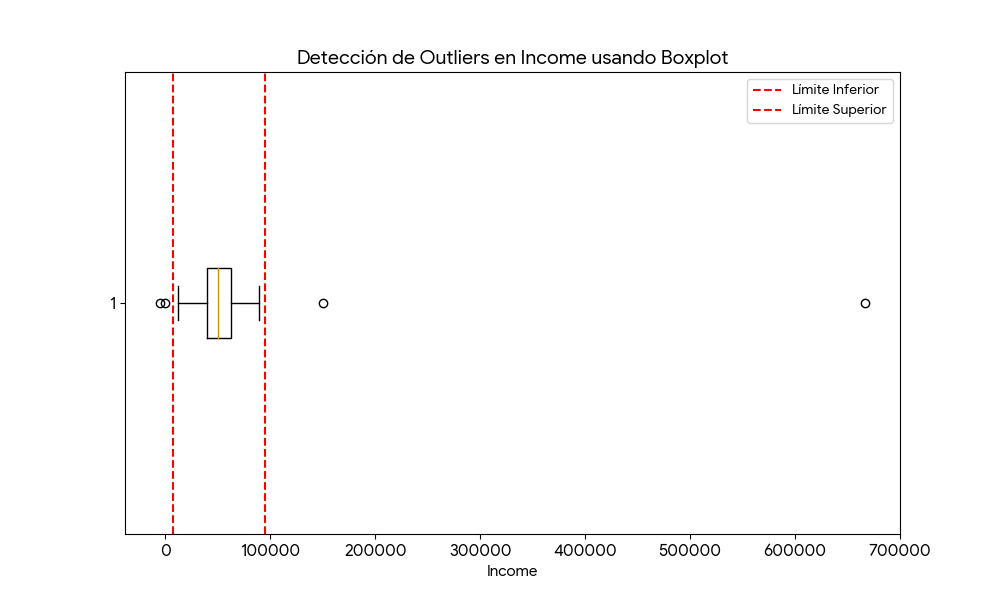

In [12]:
print("=" * 80)
print("DETECCIÓN Y TRATAMIENTO DE OUTLIERS")
print("=" * 80)

# Detectar outliers en Age (valores irreales como edad > 100 o < 18)
print("\n Estadísticas de Age antes de tratamiento:")
print(df_clean['Age'].describe())

# Filtrar edades razonables (18-100 años)
outliers_age = df_clean[(df_clean['Age'] < 18) | (df_clean['Age'] > 100)]
print(f"\n Outliers detectados en Age: {len(outliers_age)} registros")

if len(outliers_age) > 0:
    # Eliminar registros con edades irreales
    df_clean = df_clean[(df_clean['Age'] >= 18) & (df_clean['Age'] <= 100)]
    print(f" Registros después de eliminar outliers de Age: {len(df_clean)}")

# Detectar outliers en Income usando IQR
Q1_income = df_clean['Income'].quantile(0.25)
Q3_income = df_clean['Income'].quantile(0.75)
IQR_income = Q3_income - Q1_income
limite_superior_income = Q3_income + 1.5 * IQR_income

outliers_income = df_clean[df_clean['Income'] > limite_superior_income]
print(f"\n Outliers detectados en Income (> ${limite_superior_income:,.0f}): {len(outliers_income)} registros")

# Mantener outliers de Income pero documentarlos (pueden ser clientes premium legítimos)
print("ℹ Los outliers de Income se mantienen ya que pueden representar clientes premium legítimos.")

print(f"\n Dataset final: {df_clean.shape[0]} registros x {df_clean.shape[1]} columnas")

DETECCIÓN Y TRATAMIENTO DE OUTLIERS

 Estadísticas de Age antes de tratamiento:
count    2240.000000
mean       57.194196
std        11.984069
min        30.000000
25%        49.000000
50%        56.000000
75%        67.000000
max       133.000000
Name: Age, dtype: float64

 Outliers detectados en Age: 3 registros
 Registros después de eliminar outliers de Age: 2237

 Outliers detectados en Income (> $117,418): 8 registros
ℹ Los outliers de Income se mantienen ya que pueden representar clientes premium legítimos.

 Dataset final: 2237 registros x 29 columnas


### 6.5 Simplificación de Variables Categóricas

**Objetivo:** Reducir la cardinalidad de las variables categóricas para mejorar la eficiencia de K-Prototypes.

### Variable `Marital_Status`:

**Problema:** Tiene 8 categorías, algunas con muy pocos registros y otras que son semánticamente similares.

**Solución:** Agrupar en 2 categorías principales:

| Categorías Originales | Nueva Categoría | Justificación |
|----------------------|-----------------|---------------|
| Married, Together | **Partner** | Ambas indican que el cliente tiene pareja. Similar comportamiento de compra esperado. |
| Single, Divorced, Widow, Alone, Absurd, YOLO | **Single** | Todas indican que el cliente no tiene pareja actualmente. |

**Beneficios:**
- Reduce el ruido de categorías con pocos datos.
- Simplifica la interpretación de los clusters.
- Mejora la estabilidad del algoritmo K-Prototypes.

In [13]:
print("=" * 80)
print("SIMPLIFICACIÓN DE VARIABLES CATEGÓRICAS")
print("=" * 80)

# Simplificar Marital_Status (agrupar categorías similares)
print("\n Valores originales de Marital_Status:")
print(df_clean['Marital_Status'].value_counts())

# Agrupar: Single, Together (en pareja), Previous (divorciados/viudos)
df_clean['Marital_Status'] = df_clean['Marital_Status'].replace({
    'Married': 'Partner',
    'Together': 'Partner',
    'Single': 'Single',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single'
})

print("\n Valores simplificados de Marital_Status:")
print(df_clean['Marital_Status'].value_counts())

# Verificar Education
print("\n Valores de Education:")
print(df_clean['Education'].value_counts())

SIMPLIFICACIÓN DE VARIABLES CATEGÓRICAS

 Valores originales de Marital_Status:
Marital_Status
Married     864
Together    579
Single      479
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

 Valores simplificados de Marital_Status:
Marital_Status
Partner    1443
Single      794
Name: count, dtype: int64

 Valores de Education:
Education
Graduation    1127
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: count, dtype: int64


---

## 7. PREPARACIÓN DE DATOS PARA K-MEANS

K-Means solo trabaja con datos numéricos, por lo que debemos:
1. Seleccionar solo variables numéricas
2. Estandarizar los datos (muy importante para K-Means)

In [14]:
print("=" * 80)
print("PREPARACIÓN DE DATOS PARA K-MEANS")
print("=" * 80)

# Seleccionar solo columnas numéricas para K-Means
vars_numericas_kmeans = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\n Variables numéricas para K-Means ({len(vars_numericas_kmeans)}):")
print(vars_numericas_kmeans)

# Crear dataset solo con variables numéricas
df_kmeans = df_clean[vars_numericas_kmeans].copy()

# Estandarizar los datos
# IMPORTANTE: K-Means es sensible a la escala de las variables
scaler = StandardScaler()
X_kmeans_scaled = scaler.fit_transform(df_kmeans)

print(f"\n Datos estandarizados: {X_kmeans_scaled.shape}")
print(f"\n Verificación de estandarización:")
print(f"   Media de cada columna: {X_kmeans_scaled.mean(axis=0)[:5].round(4)}...")
print(f"   Std de cada columna: {X_kmeans_scaled.std(axis=0)[:5].round(4)}...")

PREPARACIÓN DE DATOS PARA K-MEANS

 Variables numéricas para K-Means (27):
['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Age', 'TotalChildren', 'TotalMnt', 'TotalPurchases', 'TotalAcceptedCmp', 'Customer_Days']

 Datos estandarizados: (2237, 27)

 Verificación de estandarización:
   Media de cada columna: [ 0.  0. -0.  0.  0.]...
   Std de cada columna: [1. 1. 1. 1. 1.]...


---

## 8. K-MEANS: MÉTODO DEL CODO Y SILHOUETTE

Para determinar el número óptimo de clusters usamos:
1. **Método del Codo (Elbow Method):** Busca el punto donde la inercia deja de decrecer significativamente
2. **Silhouette Score:** Mide qué tan bien separados están los clusters (-1 a 1, mejor cercano a 1)

In [15]:
print("=" * 80)
print("MÉTODO DEL CODO Y SILHOUETTE SCORE")
print("=" * 80)

# Rango de valores de K a probar
k_range = range(2, 11)

# Listas para almacenar métricas
inertias = []
silhouette_scores = []
calinski_scores = []
davies_bouldin_scores = []

print("\n Evaluando diferentes valores de K...")
print("-" * 80)

for k in k_range:
    # Configurar y entrenar K-Means
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        init='k-means++',
        n_init=10,
        max_iter=300
    )

    clusters = kmeans.fit_predict(X_kmeans_scaled)

    # Calcular métricas
    inertia = kmeans.inertia_
    silhouette = silhouette_score(X_kmeans_scaled, clusters)
    calinski = calinski_harabasz_score(X_kmeans_scaled, clusters)
    davies = davies_bouldin_score(X_kmeans_scaled, clusters)

    inertias.append(inertia)
    silhouette_scores.append(silhouette)
    calinski_scores.append(calinski)
    davies_bouldin_scores.append(davies)

    print(f"K={k:2d} | Inertia={inertia:10.2f} | Silhouette={silhouette:.4f} | Calinski-Harabasz={calinski:8.2f} | Davies-Bouldin={davies:.4f}")

# Encontrar el mejor K según Silhouette
mejor_k_silhouette = k_range[np.argmax(silhouette_scores)]
print("-" * 80)
print(f"\n Mejor K según Silhouette Score: k ={mejor_k_silhouette} (score={max(silhouette_scores):.4f})")

MÉTODO DEL CODO Y SILHOUETTE SCORE

 Evaluando diferentes valores de K...
--------------------------------------------------------------------------------
K= 2 | Inertia=  45454.18 | Silhouette=0.2748 | Calinski-Harabasz=  734.84 | Davies-Bouldin=1.6250
K= 3 | Inertia=  41014.90 | Silhouette=0.2074 | Calinski-Harabasz=  527.91 | Davies-Bouldin=2.0164
K= 4 | Inertia=  37725.84 | Silhouette=0.2038 | Calinski-Harabasz=  447.34 | Davies-Bouldin=1.9471
K= 5 | Inertia=  35878.70 | Silhouette=0.1352 | Calinski-Harabasz=  381.35 | Davies-Bouldin=2.0502
K= 6 | Inertia=  33798.90 | Silhouette=0.1414 | Calinski-Harabasz=  351.16 | Davies-Bouldin=1.8055
K= 7 | Inertia=  32374.41 | Silhouette=0.2163 | Calinski-Harabasz=  321.73 | Davies-Bouldin=1.6420
K= 8 | Inertia=  30472.75 | Silhouette=0.1565 | Calinski-Harabasz=  312.72 | Davies-Bouldin=1.6190
K= 9 | Inertia=  29409.48 | Silhouette=0.1619 | Calinski-Harabasz=  293.46 | Davies-Bouldin=1.5839
K=10 | Inertia=  28506.35 | Silhouette=0.1486 | Calin

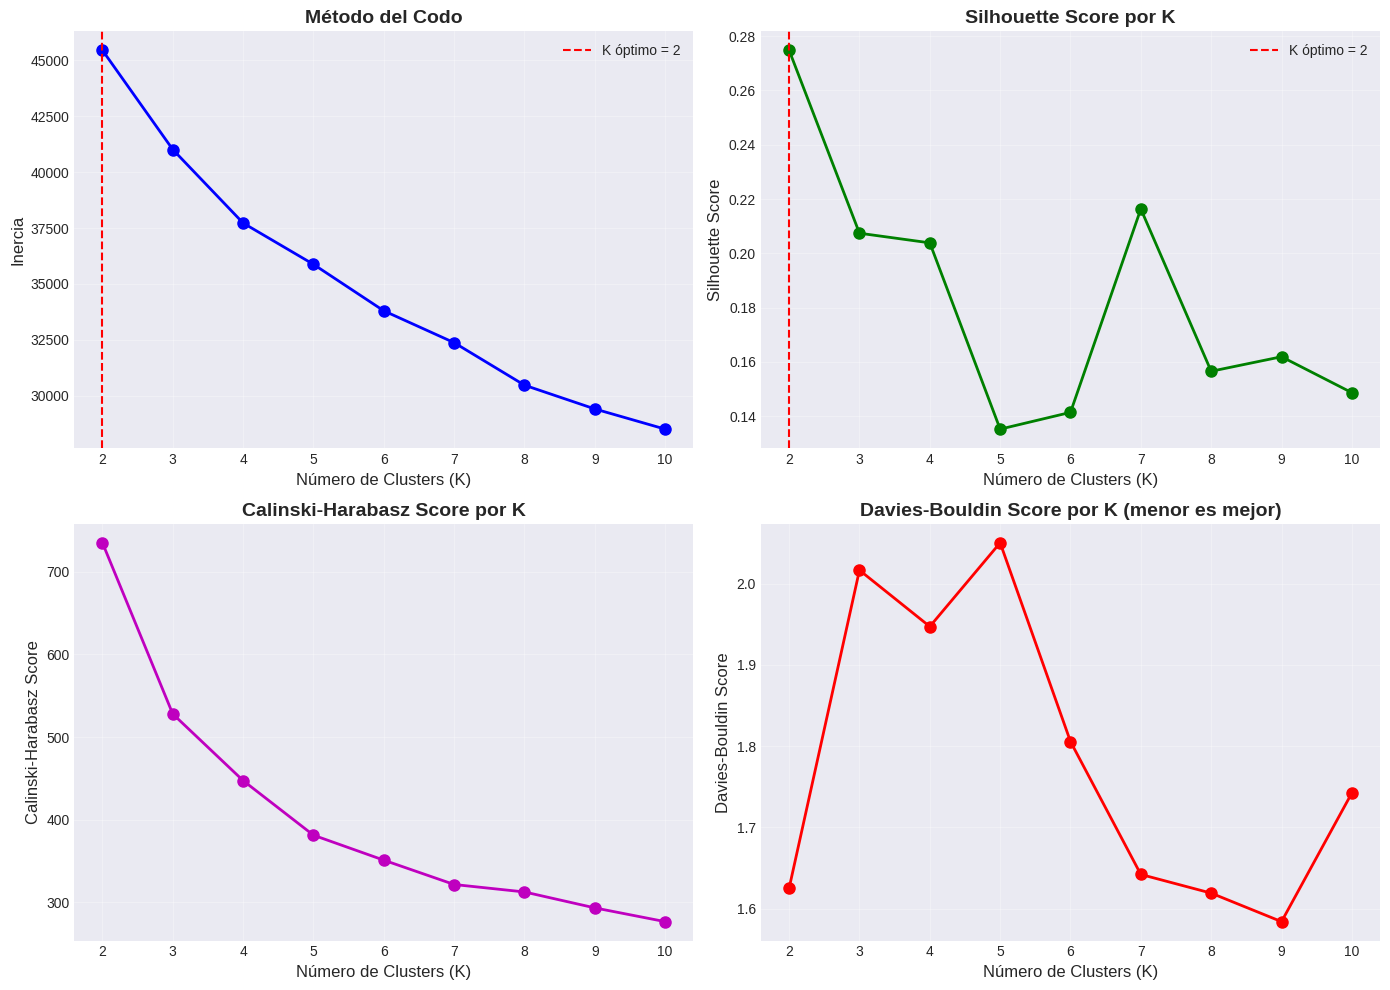

In [16]:
# Visualización del Método del Codo y Silhouette
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Método del Codo
axes[0, 0].plot(list(k_range), inertias, 'bo-', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('Número de Clusters (K)', fontsize=12)
axes[0, 0].set_ylabel('Inercia', fontsize=12)
axes[0, 0].set_title('Método del Codo', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].axvline(x=mejor_k_silhouette, color='red', linestyle='--', label=f'K óptimo = {mejor_k_silhouette}')
axes[0, 0].legend()

# 2. Silhouette Score
axes[0, 1].plot(list(k_range), silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[0, 1].set_xlabel('Número de Clusters (K)', fontsize=12)
axes[0, 1].set_ylabel('Silhouette Score', fontsize=12)
axes[0, 1].set_title('Silhouette Score por K', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].axvline(x=mejor_k_silhouette, color='red', linestyle='--', label=f'K óptimo = {mejor_k_silhouette}')
axes[0, 1].legend()

# 3. Calinski-Harabasz Score
axes[1, 0].plot(list(k_range), calinski_scores, 'mo-', linewidth=2, markersize=8)
axes[1, 0].set_xlabel('Número de Clusters (K)', fontsize=12)
axes[1, 0].set_ylabel('Calinski-Harabasz Score', fontsize=12)
axes[1, 0].set_title('Calinski-Harabasz Score por K', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 4. Davies-Bouldin Score (menor es mejor)
axes[1, 1].plot(list(k_range), davies_bouldin_scores, 'ro-', linewidth=2, markersize=8)
axes[1, 1].set_xlabel('Número de Clusters (K)', fontsize=12)
axes[1, 1].set_ylabel('Davies-Bouldin Score', fontsize=12)
axes[1, 1].set_title('Davies-Bouldin Score por K (menor es mejor)', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---

## 9. K-MEANS: MODELO FINAL

Aplicamos K-Means con el número óptimo de clusters identificado.

**Que pasa con los grupos si esque no se fija el parametro random state para lo modelos?**

Si no se fija el parámetro random_state, los resultados de los clusters pueden variar en cada ejecución del algoritmo y esto ocurre porque:

Tanto K-Means como K-Prototypes comienzan seleccionando centroides iniciales de forma aleatoria y si no se fija la semilla, cada ejecución puede comenzar con centroides diferentes.

Tambien si no se fija random_state, no se podrá reproducir exactamente los mismos resultados

Por lo que fijar random_state=42 (o cualquier número) garantiza que los resultados sean reproducibles y que siempre se obtenga los mismos clusters al ejecutar el código.

In [17]:
print("=" * 80)
print("MODELO K-MEANS FINAL")
print("=" * 80)

# Usar el K óptimo según Silhouette
k_optimo = mejor_k_silhouette

# Entrenar modelo final
kmeans_final = KMeans(
    n_clusters=k_optimo,
    random_state=42,
    init='k-means++',
    n_init=10,
    max_iter=100
)

# Asignar clusters
clusters_kmeans = kmeans_final.fit_predict(X_kmeans_scaled)

# Agregar clusters al dataframe
df_clean['Cluster_KMeans'] = clusters_kmeans

print(f"\n K-Means aplicado con K = {k_optimo}")
print(f"\n Distribución de clusters:")
print(df_clean['Cluster_KMeans'].value_counts().sort_index())

# Métricas finales
print(f"\n Métricas del modelo final:")
print(f"   Inercia: {kmeans_final.inertia_:.2f}")
print(f"   Silhouette Score: {silhouette_score(X_kmeans_scaled, clusters_kmeans):.4f}")
print(f"   Calinski-Harabasz Score: {calinski_harabasz_score(X_kmeans_scaled, clusters_kmeans):.2f}")
print(f"   Davies-Bouldin Score: {davies_bouldin_score(X_kmeans_scaled, clusters_kmeans):.4f}")

MODELO K-MEANS FINAL

 K-Means aplicado con K = 2

 Distribución de clusters:
Cluster_KMeans
0    1322
1     915
Name: count, dtype: int64

 Métricas del modelo final:
   Inercia: 45454.18
   Silhouette Score: 0.2748
   Calinski-Harabasz Score: 734.84
   Davies-Bouldin Score: 1.6250


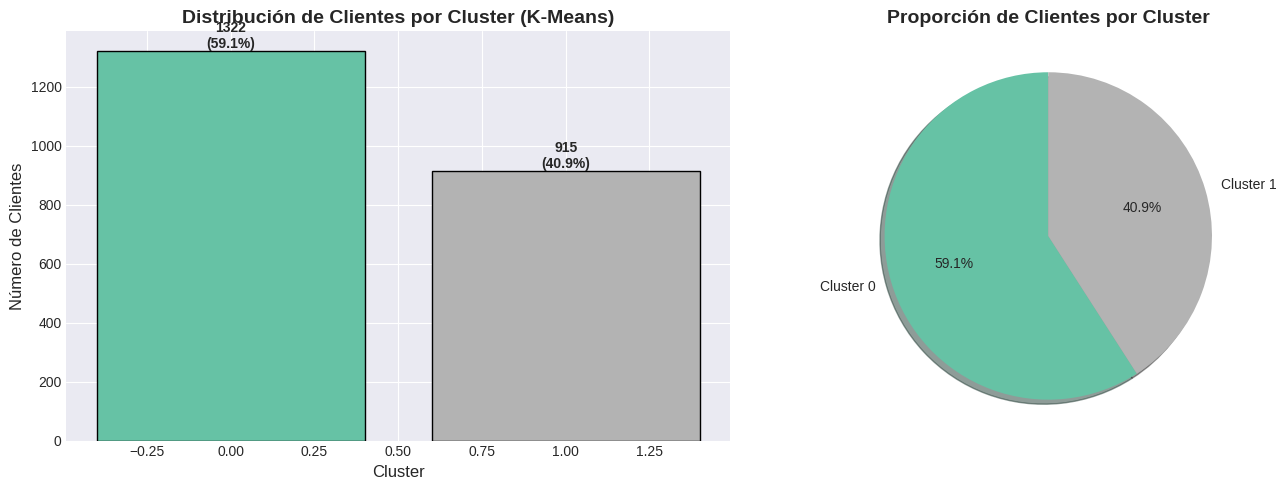

In [18]:
# Visualización de la distribución de clusters
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
cluster_counts = df_clean['Cluster_KMeans'].value_counts().sort_index()
colors = plt.cm.Set2(np.linspace(0, 1, k_optimo))

axes[0].bar(cluster_counts.index, cluster_counts.values, color=colors, edgecolor='black')
axes[0].set_xlabel('Cluster', fontsize=12)
axes[0].set_ylabel('Número de Clientes', fontsize=12)
axes[0].set_title('Distribución de Clientes por Cluster (K-Means)', fontsize=14, fontweight='bold')
for i, v in enumerate(cluster_counts.values):
    axes[0].text(i, v + 10, f'{v}\n({v/len(df_clean)*100:.1f}%)', ha='center', fontweight='bold')

# Gráfico de pastel
axes[1].pie(cluster_counts.values, labels=[f'Cluster {i}' for i in cluster_counts.index],
            autopct='%1.1f%%', colors=colors, shadow=True, startangle=90)
axes[1].set_title('Proporción de Clientes por Cluster', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


 Centroides de cada cluster (datos estandarizados):



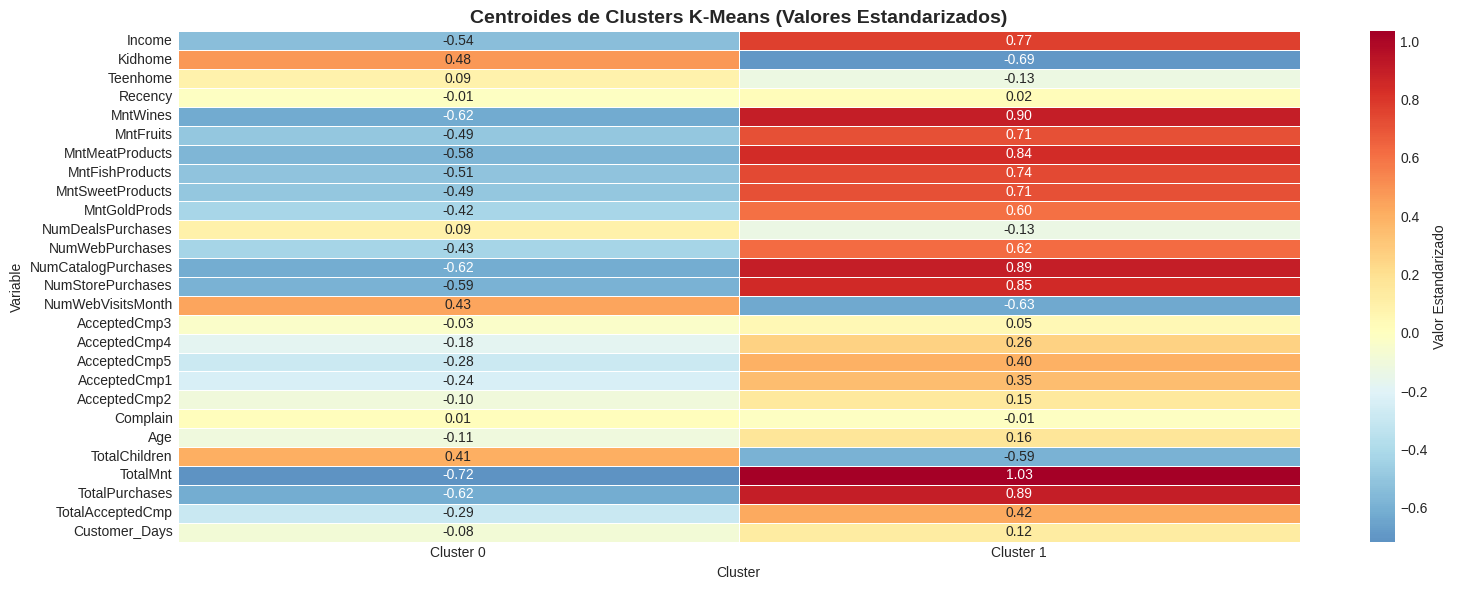

In [19]:
# Heatmap de centroides normalizados
print("\n Centroides de cada cluster (datos estandarizados):\n")

# Crear dataframe con centroides
centroides_df = pd.DataFrame(
    kmeans_final.cluster_centers_,
    columns=vars_numericas_kmeans,
    index=[f'Cluster {i}' for i in range(k_optimo)]
)

# Visualizar heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(centroides_df.T, annot=True, fmt='.2f', cmap='RdYlBu_r', center=0,
            linewidths=0.5, cbar_kws={'label': 'Valor Estandarizado'})
plt.title('Centroides de Clusters K-Means (Valores Estandarizados)', fontsize=14, fontweight='bold')
plt.xlabel('Cluster')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

---

## 10. K-PROTOTYPES: CLUSTERING CON DATOS MIXTOS

K-Prototypes es una extensión de K-Means que permite trabajar con variables numéricas y categóricas simultáneamente. Utiliza:
- **Distancia Euclidiana** para variables numéricas
- **Distancia de Hamming** para variables categóricas
- **Parámetro gamma (λ)** para balancear la importancia entre ambos tipos

### 10.1 Preparación de Datos para K-Prototypes

In [20]:
print("=" * 80)
print("PREPARACIÓN DE DATOS PARA K-PROTOTYPES")
print("=" * 80)

# Crear dataset para K-Prototypes (sin el cluster de K-Means)
df_kproto = df_clean.drop(columns=['Cluster_KMeans']).copy()

# Identificar variables categóricas y numéricas
vars_categoricas_kproto = df_kproto.select_dtypes(include=['object']).columns.tolist()
vars_numericas_kproto = df_kproto.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\n Variables Categóricas ({len(vars_categoricas_kproto)}): {vars_categoricas_kproto}")
print(f" Variables Numéricas ({len(vars_numericas_kproto)}): {vars_numericas_kproto}")

# Estandarizar solo las variables numéricas
scaler_kproto = StandardScaler()
df_kproto_scaled = df_kproto.copy()
df_kproto_scaled[vars_numericas_kproto] = scaler_kproto.fit_transform(df_kproto[vars_numericas_kproto])

# Reorganizar columnas: numéricas primero, categóricas después
columnas_ordenadas = vars_numericas_kproto + vars_categoricas_kproto
df_kproto_scaled = df_kproto_scaled[columnas_ordenadas]

# Convertir a matriz numpy (K-Prototypes requiere esto)
X_kproto = df_kproto_scaled.values

# Obtener índices de columnas categóricas
indices_categoricas = [columnas_ordenadas.index(col) for col in vars_categoricas_kproto]

print(f"\n Datos preparados para K-Prototypes")
print(f"   Forma del dataset: {X_kproto.shape}")
print(f"   Índices de columnas categóricas: {indices_categoricas}")

PREPARACIÓN DE DATOS PARA K-PROTOTYPES

 Variables Categóricas (2): ['Education', 'Marital_Status']
 Variables Numéricas (27): ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Age', 'TotalChildren', 'TotalMnt', 'TotalPurchases', 'TotalAcceptedCmp', 'Customer_Days']

 Datos preparados para K-Prototypes
   Forma del dataset: (2237, 29)
   Índices de columnas categóricas: [27, 28]


### 10.2 Determinación del K Óptimo para K-Prototypes

In [21]:
print("=" * 80)
print("MÉTODO DEL CODO PARA K-PROTOTYPES")
print("=" * 80)

# Rango de valores de K a probar
k_range_kproto = range(2, 9)
costs_kproto = []

print("\n Evaluando diferentes valores de K para K-Prototypes...")
print("-" * 60)

for k in k_range_kproto:
    kproto = KPrototypes(
        n_clusters=k,
        init='Cao',
        n_init=5,
        gamma=0.5,   # Balance entre numéricas y categóricas
        max_iter=100,
        random_state=42,
        verbose=0
    )

    clusters = kproto.fit_predict(X_kproto, categorical=indices_categoricas)
    cost = kproto.cost_
    costs_kproto.append(cost)

    print(f"K={k} | Costo={cost:.2f}")

print("-" * 60)

MÉTODO DEL CODO PARA K-PROTOTYPES

 Evaluando diferentes valores de K para K-Prototypes...
------------------------------------------------------------
K=2 | Costo=46406.18
K=3 | Costo=41966.89
K=4 | Costo=38677.23
K=5 | Costo=37278.19
K=6 | Costo=35273.95
K=7 | Costo=34194.60
K=8 | Costo=32785.60
------------------------------------------------------------


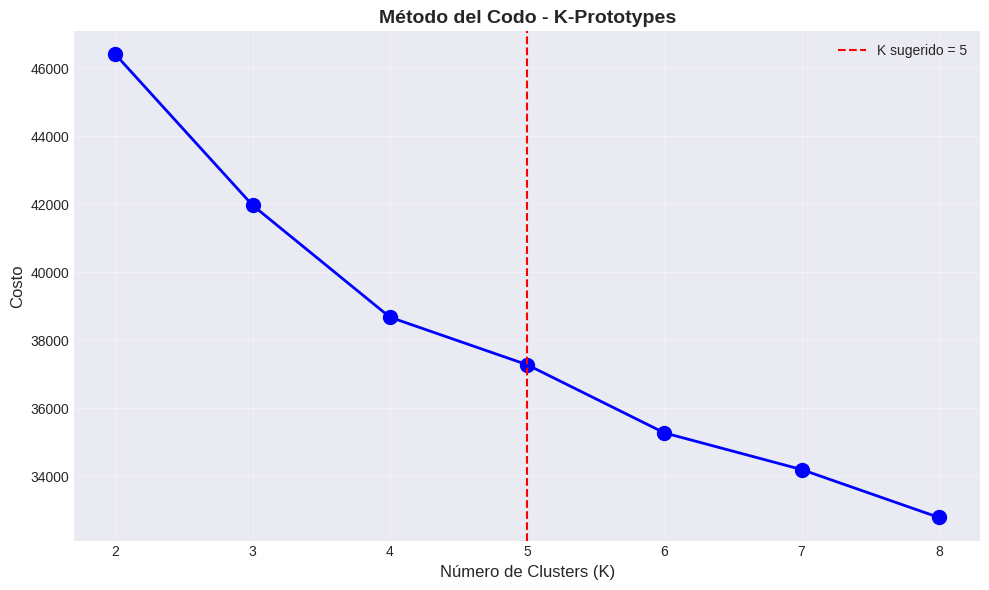


 K sugerido por el método del codo: 5


In [22]:
# Visualización del método del codo para K-Prototypes
plt.figure(figsize=(10, 6))
plt.plot(list(k_range_kproto), costs_kproto, 'bo-', linewidth=2, markersize=10)
plt.xlabel('Número de Clusters (K)', fontsize=12)
plt.ylabel('Costo', fontsize=12)
plt.title('Método del Codo - K-Prototypes', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(list(k_range_kproto))

# Marcar el codo (aproximadamente)
# Usar diferencias para encontrar el codo
diffs = np.diff(costs_kproto)
diffs2 = np.diff(diffs)
elbow_idx = np.argmax(diffs2) + 2  # +2 porque perdemos 2 elementos con diff
k_optimo_kproto = list(k_range_kproto)[elbow_idx]

plt.axvline(x=k_optimo_kproto, color='red', linestyle='--', label=f'K sugerido = {k_optimo_kproto}')
plt.legend()
plt.tight_layout()
plt.show()

print(f"\n K sugerido por el método del codo: {k_optimo_kproto}")

### 10.3 Modelo K-Prototypes Final

In [23]:
print("=" * 80)
print("MODELO K-PROTOTYPES FINAL")
print("=" * 80)

# Usar el mismo K que K-Means para comparación justa, o el sugerido
# Usaremos el mismo K óptimo de K-Means para comparar
k_final_kproto = k_optimo  # Mismo K que K-Means

print(f"\n Usando K = {k_final_kproto} para comparación con K-Means")

# Entrenar modelo final
kproto_final = KPrototypes(
    n_clusters=k_final_kproto,
    init='Cao',
    n_init=10,
    gamma=0.5,
    max_iter=100,
    random_state=42,
    verbose=0
)

clusters_kproto = kproto_final.fit_predict(X_kproto, categorical=indices_categoricas)

# Agregar clusters al dataframe original
df_clean['Cluster_KProto'] = clusters_kproto

print(f"\n K-Prototypes aplicado con K = {k_final_kproto}")
print(f"\n Distribución de clusters:")
print(df_clean['Cluster_KProto'].value_counts().sort_index())
print(f"\n Costo del modelo: {kproto_final.cost_:.2f}")

MODELO K-PROTOTYPES FINAL

 Usando K = 2 para comparación con K-Means

 K-Prototypes aplicado con K = 2

 Distribución de clusters:
Cluster_KProto
0     915
1    1322
Name: count, dtype: int64

 Costo del modelo: 46406.18


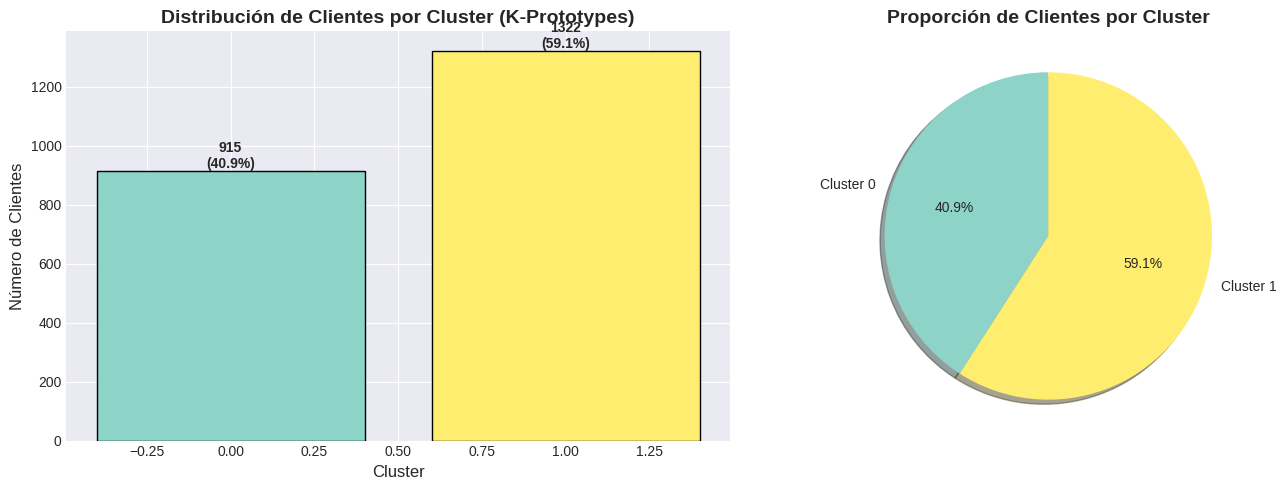

In [24]:
# Visualización de la distribución de clusters K-Prototypes
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
cluster_counts_kproto = df_clean['Cluster_KProto'].value_counts().sort_index()
colors = plt.cm.Set3(np.linspace(0, 1, k_final_kproto))

axes[0].bar(cluster_counts_kproto.index, cluster_counts_kproto.values, color=colors, edgecolor='black')
axes[0].set_xlabel('Cluster', fontsize=12)
axes[0].set_ylabel('Número de Clientes', fontsize=12)
axes[0].set_title('Distribución de Clientes por Cluster (K-Prototypes)', fontsize=14, fontweight='bold')
for i, v in enumerate(cluster_counts_kproto.values):
    axes[0].text(i, v + 10, f'{v}\n({v/len(df_clean)*100:.1f}%)', ha='center', fontweight='bold')

# Gráfico de pastel
axes[1].pie(cluster_counts_kproto.values, labels=[f'Cluster {i}' for i in cluster_counts_kproto.index],
            autopct='%1.1f%%', colors=colors, shadow=True, startangle=90)
axes[1].set_title('Proporción de Clientes por Cluster', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [25]:
# Visualización de centroides de K-Prototypes
print("\n Centroides del modelo K-Prototypes:\n")

# Debug: Inspeccionar la estructura completa de cluster_centroids_
print(" DEBUG - Estructura de cluster_centroids_:")
print(f"   Tipo: {type(kproto_final.cluster_centroids_)}")
print(f"   Longitud: {len(kproto_final.cluster_centroids_)}")
for i, c in enumerate(kproto_final.cluster_centroids_):
    print(f"   cluster_centroids_[{i}] shape: {np.array(c).shape}")
print()

# K-Prototypes devuelve cluster_centroids_ como un array donde:
# - Cada elemento [i] es el centroide completo del cluster i
# - Contiene TODAS las variables (numéricas + categóricas) en el orden que las pasamos
# Nuestro orden fue: numéricas primero (27), categóricas después (2) = 29 total

# Número de variables
n_num = len(vars_numericas_kproto)  # 27
n_cat = len(vars_categoricas_kproto)  # 2

print(f" Variables numéricas: {n_num}")
print(f" Variables categóricas: {n_cat}")
print(f" Número de clusters: {k_final_kproto}\n")

# Construir matriz de centroides: cada fila es un cluster
centroides_todos = np.array([kproto_final.cluster_centroids_[i] for i in range(k_final_kproto)])
print(f" Forma de centroides completos: {centroides_todos.shape}")

# Separar centroides numéricos y categóricos
centroides_num = centroides_todos[:, :n_num]  # Primeras 27 columnas
centroides_cat = centroides_todos[:, n_num:]  # Últimas 2 columnas

print(f" Forma centroides numéricos: {centroides_num.shape}")
print(f" Forma centroides categóricos: {centroides_cat.shape}\n")

print("Centroides Numéricos (estandarizados):")
centroides_num_df = pd.DataFrame(
    centroides_num,
    columns=vars_numericas_kproto,
    index=[f'Cluster {i}' for i in range(k_final_kproto)]
)
print(centroides_num_df.round(2).to_string())

print("\n\nCentroides Categóricos (modas):")
centroides_cat_df = pd.DataFrame(
    centroides_cat,
    columns=vars_categoricas_kproto,
    index=[f'Cluster {i}' for i in range(k_final_kproto)]
)
print(centroides_cat_df.to_string())


 Centroides del modelo K-Prototypes:

 DEBUG - Estructura de cluster_centroids_:
   Tipo: <class 'numpy.ndarray'>
   Longitud: 2
   cluster_centroids_[0] shape: (29,)
   cluster_centroids_[1] shape: (29,)

 Variables numéricas: 27
 Variables categóricas: 2
 Número de clusters: 2

 Forma de centroides completos: (2, 29)
 Forma centroides numéricos: (2, 27)
 Forma centroides categóricos: (2, 2)

Centroides Numéricos (estandarizados):
                        Income              Kidhome              Teenhome                Recency             MntWines            MntFruits      MntMeatProducts      MntFishProducts     MntSweetProducts         MntGoldProds     NumDealsPurchases       NumWebPurchases  NumCatalogPurchases   NumStorePurchases    NumWebVisitsMonth          AcceptedCmp3          AcceptedCmp4         AcceptedCmp5          AcceptedCmp1          AcceptedCmp2               Complain                   Age        TotalChildren             TotalMnt       TotalPurchases     TotalAccepted

---

## 11. ANÁLISIS DE CLUSTERS: EXTRACCIÓN DE INFORMACIÓN POR GRUPO

En esta sección extraeremos la información detallada de cada cluster para entender sus características.

### ¿Por qué es importante analizar cada cluster?

Una vez que el algoritmo ha creado los grupos, necesitamos **interpretar** qué significa cada cluster en términos de negocio:
- ¿Qué tipo de clientes agrupa cada cluster?
- ¿Cuáles son sus características demográficas?
- ¿Cómo es su comportamiento de compra?

### ¿Qué haremos?

1. **Extraer estadísticas por cluster:** Calcular promedios y distribuciones de variables clave
2. **Visualizar los datos:** Ver los primeros registros de cada grupo
3. **Crear perfiles de cliente:** Dar nombres descriptivos a cada segmento (ej: "Clientes Premium", "Familias Jóvenes")

In [ ]:
print("=" * 80)
print("EXTRACCIÓN DE INFORMACIÓN POR CLUSTER (K-MEANS)")
print("=" * 80)

# ============================================================================
# FUNCIÓN PARA ANALIZAR CADA CLUSTER
# ============================================================================
# Esta función toma el dataframe completo y extrae información de UN cluster específico
# Parámetros:
#   - df: DataFrame con todos los datos
#   - columna_cluster: nombre de la columna que contiene las etiquetas de cluster
#   - cluster_id: número del cluster a analizar (0, 1, 2, etc.)
# ============================================================================

def analizar_cluster(df, columna_cluster, cluster_id):
    """
    Extrae información detallada de un cluster específico
    
    ¿Qué hace esta función?
    1. Filtra el DataFrame para obtener solo los clientes de un cluster
    2. Calcula estadísticas descriptivas (promedios, conteos)
    3. Muestra distribuciones de variables categóricas
    
    Retorna: DataFrame filtrado con solo los clientes del cluster
    """
    # PASO 1: Filtrar datos del cluster
    # Esto crea un nuevo DataFrame con solo las filas donde el cluster coincide
    cluster_data = df[df[columna_cluster] == cluster_id]
    
    # PASO 2: Mostrar información básica del cluster
    print(f"\n{'='*60}")
    print(f"CLUSTER {cluster_id}")
    print(f"{'='*60}")
    print(f"Número de clientes: {len(cluster_data)} ({len(cluster_data)/len(df)*100:.1f}%)")
    
    # PASO 3: Estadísticas demográficas (características de los clientes)
    print(f"\n--- ESTADÍSTICAS DEMOGRÁFICAS ---")
    print(f"Edad promedio: {cluster_data['Age'].mean():.1f} años")
    print(f"Ingreso promedio: ${cluster_data['Income'].mean():,.0f}")
    print(f"Hijos promedio: {cluster_data['TotalChildren'].mean():.2f}")
    
    # PASO 4: Comportamiento de compra
    print(f"\n--- COMPORTAMIENTO DE COMPRA ---")
    print(f"Gasto total promedio: ${cluster_data['TotalMnt'].mean():,.0f}")
    print(f"Compras totales promedio: {cluster_data['TotalPurchases'].mean():.1f}")
    print(f"Antigüedad promedio: {cluster_data['Customer_Days'].mean():.0f} días")
    
    # PASO 5: Distribución de variables categóricas
    # value_counts() cuenta cuántos clientes hay en cada categoría
    print(f"\n--- DISTRIBUCIÓN DE CATEGORÍAS ---")
    print(f"Education:")
    print(cluster_data['Education'].value_counts().to_string())
    print(f"\nMarital_Status:")
    print(cluster_data['Marital_Status'].value_counts().to_string())
    
    return cluster_data

# ============================================================================
# ANALIZAR CADA CLUSTER DE K-MEANS
# ============================================================================
# Este diccionario almacenará los DataFrames de cada cluster para uso posterior
clusters_kmeans_info = {}

# Iterar sobre cada cluster único encontrado por K-Means
for cluster_id in sorted(df_clean['Cluster_KMeans'].unique()):
    # Llamar a la función de análisis y guardar el resultado
    clusters_kmeans_info[cluster_id] = analizar_cluster(df_clean, 'Cluster_KMeans', cluster_id)

EXTRACCIÓN DE INFORMACIÓN POR CLUSTER (K-MEANS)

CLUSTER 0
Número de clientes: 1322 (59.1%)

--- ESTADÍSTICAS DEMOGRÁFICAS ---
Edad promedio: 55.8 años
Ingreso promedio: $38,819
Hijos promedio: 1.26

--- COMPORTAMIENTO DE COMPRA ---
Gasto total promedio: $175
Compras totales promedio: 10.1
Antigüedad promedio: 4552 días

--- DISTRIBUCIÓN DE CATEGORÍAS ---
Education:
Education
Graduation    645
PhD           271
Master        229
2n Cycle      124
Basic          53

Marital_Status:
Marital_Status
Partner    872
Single     450

CLUSTER 1
Número de clientes: 915 (40.9%)

--- ESTADÍSTICAS DEMOGRÁFICAS ---
Edad promedio: 59.0 años
Ingreso promedio: $71,599
Hijos promedio: 0.51

--- COMPORTAMIENTO DE COMPRA ---
Gasto total promedio: $1,227
Compras totales promedio: 21.7
Antigüedad promedio: 4593 días

--- DISTRIBUCIÓN DE CATEGORÍAS ---
Education:
Education
Graduation    482
PhD           214
Master        141
2n Cycle       77
Basic           1

Marital_Status:
Marital_Status
Partner    571


In [ ]:
print("\n" + "=" * 80)
print("EXTRACCIÓN DE INFORMACIÓN POR CLUSTER (K-PROTOTYPES)")
print("=" * 80)

# ============================================================================
# ANALIZAR CADA CLUSTER DE K-PROTOTYPES
# ============================================================================
# Hacemos lo mismo pero ahora para los clusters generados por K-Prototypes
# Esto nos permite comparar si K-Prototypes (que usa variables categóricas)
# genera clusters diferentes a K-Means (solo numéricas)
# ============================================================================

clusters_kproto_info = {}
for cluster_id in sorted(df_clean['Cluster_KProto'].unique()):
    clusters_kproto_info[cluster_id] = analizar_cluster(df_clean, 'Cluster_KProto', cluster_id)


EXTRACCIÓN DE INFORMACIÓN POR CLUSTER (K-PROTOTYPES)

CLUSTER 0
Número de clientes: 915 (40.9%)

--- ESTADÍSTICAS DEMOGRÁFICAS ---
Edad promedio: 59.0 años
Ingreso promedio: $71,599
Hijos promedio: 0.51

--- COMPORTAMIENTO DE COMPRA ---
Gasto total promedio: $1,227
Compras totales promedio: 21.7
Antigüedad promedio: 4593 días

--- DISTRIBUCIÓN DE CATEGORÍAS ---
Education:
Education
Graduation    482
PhD           214
Master        141
2n Cycle       77
Basic           1

Marital_Status:
Marital_Status
Partner    571
Single     344

CLUSTER 1
Número de clientes: 1322 (59.1%)

--- ESTADÍSTICAS DEMOGRÁFICAS ---
Edad promedio: 55.8 años
Ingreso promedio: $38,819
Hijos promedio: 1.26

--- COMPORTAMIENTO DE COMPRA ---
Gasto total promedio: $175
Compras totales promedio: 10.1
Antigüedad promedio: 4552 días

--- DISTRIBUCIÓN DE CATEGORÍAS ---
Education:
Education
Graduation    645
PhD           271
Master        229
2n Cycle      124
Basic          53

Marital_Status:
Marital_Status
Partner  

### 11.1 Observar los DataFrames por Cluster

Aquí podemos visualizar los datos completos de cada cluster individualmente.

**¿Para qué sirve esto?**
- Ver ejemplos reales de clientes en cada grupo
- Verificar que el clustering tiene sentido
- Detectar patrones específicos o anomalías

In [ ]:
print("=" * 80)
print("VISUALIZACIÓN DE DATAFRAMES POR CLUSTER (K-MEANS)")
print("=" * 80)

# ============================================================================
# MOSTRAR LOS PRIMEROS REGISTROS DE CADA CLUSTER
# ============================================================================
# Esto nos permite VER ejemplos reales de clientes en cada grupo
# Es útil para:
# 1. Verificar que los clusters tienen sentido
# 2. Encontrar patrones que no son evidentes en los promedios
# 3. Presentar ejemplos concretos a stakeholders
# ============================================================================

for cluster_id in sorted(df_clean['Cluster_KMeans'].unique()):
    print(f"\n{'='*80}")
    print(f"CLUSTER {cluster_id} - Primeros 5 registros:")
    print(f"{'='*80}")
    
    # Filtrar datos del cluster
    cluster_df = df_clean[df_clean['Cluster_KMeans'] == cluster_id]
    
    # Mostrar primeras 5 filas (head() muestra los primeros registros)
    print(cluster_df.head().to_string())
    
    # Mostrar dimensiones del cluster
    print(f"\nShape del Cluster {cluster_id}: {cluster_df.shape}")

VISUALIZACIÓN DE DATAFRAMES POR CLUSTER (K-MEANS)

CLUSTER 0 - Primeros 5 registros:
    Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Age  TotalChildren  TotalMnt  TotalPurchases  TotalAcceptedCmp  Customer_Days  Cluster_KMeans  Cluster_KProto
1  Graduation         Single  46344.0        1         1       38        11          1                6                2                 1             6                  2                1                    1                  2                  5             0             0             0             0             0         0   72              2        27               6                 0           4328               0               1
3  Graduation        Partner  26646.0

In [ ]:
print("\n" + "=" * 80)
print("VISUALIZACIÓN DE DATAFRAMES POR CLUSTER (K-PROTOTYPES)")
print("=" * 80)

# Lo mismo pero para K-Prototypes
for cluster_id in sorted(df_clean['Cluster_KProto'].unique()):
    print(f"\n{'='*80}")
    print(f"CLUSTER {cluster_id} - Primeros 5 registros:")
    print(f"{'='*80}")
    cluster_df = df_clean[df_clean['Cluster_KProto'] == cluster_id]
    print(cluster_df.head().to_string())
    print(f"\nShape del Cluster {cluster_id}: {cluster_df.shape}")


VISUALIZACIÓN DE DATAFRAMES POR CLUSTER (K-PROTOTYPES)

CLUSTER 0 - Primeros 5 registros:
     Education Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Age  TotalChildren  TotalMnt  TotalPurchases  TotalAcceptedCmp  Customer_Days  Cluster_KMeans  Cluster_KProto
0   Graduation         Single  58138.0        0         0       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0   69              0      1617              25                 0           4878               1               0
2   Graduation        Partner

---

## 12. ANÁLISIS DE COMPONENTES PRINCIPALES (PCA)

### ¿Qué es PCA y para qué sirve?

**PCA (Principal Component Analysis)** es una técnica de reducción de dimensionalidad que:

1. **Transforma** las variables originales en nuevas variables llamadas "componentes principales"
2. **Reduce** el número de dimensiones manteniendo la mayor cantidad de información posible
3. **Permite visualizar** datos de alta dimensión en 2D o 3D

### ¿Por qué lo necesitamos?

- **Visualización:** Ver los clusters en 2D es imposible con 27 variables originales
- **Interpretación:** Simplifica el análisis sin perder mucha información
- **Validación:** Verificar visualmente si los clusters están bien separados

In [ ]:
# ============================================================================
# IMPORTAR PCA
# ============================================================================
from sklearn.decomposition import PCA

print("=" * 80)
print("ANÁLISIS DE COMPONENTES PRINCIPALES (PCA)")
print("=" * 80)

# ============================================================================
# PASO 1: APLICAR PCA PARA REDUCIR A 2 DIMENSIONES
# ============================================================================
# ¿Qué hace PCA?
# 1. Toma las 27 variables numéricas estandarizadas (X_kmeans_scaled)
# 2. Encuentra las 2 direcciones (componentes) que capturan la mayor variación
# 3. Proyecta todos los datos sobre estas 2 direcciones
# 
# Resultado: Cada cliente ahora se representa con solo 2 números (PC1, PC2)
# en lugar de 27, pero manteniendo la mayor información posible
# ============================================================================

pca_2d = PCA(n_components=2, random_state=42)  # Queremos solo 2 componentes
X_pca_2d = pca_2d.fit_transform(X_kmeans_scaled)  # Aplicar transformación

# ============================================================================
# PASO 2: INTERPRETAR VARIANZA EXPLICADA
# ============================================================================
# ¿Cuánta información perdimos al reducir de 27 a 2 dimensiones?
# La "varianza explicada" nos dice qué % de la información original conservamos
# ============================================================================

print(f"\n Varianza explicada por componente:")
print(f"   PC1: {pca_2d.explained_variance_ratio_[0]*100:.2f}%")
print(f"   PC2: {pca_2d.explained_variance_ratio_[1]*100:.2f}%")
print(f"   Total: {pca_2d.explained_variance_ratio_.sum()*100:.2f}%")

# Ejemplo: Si PC1 explica 40% y PC2 explica 20%, entonces con solo 2 dimensiones
# estamos capturando 60% de toda la variación de las 27 variables originales

# ============================================================================
# PASO 3: CREAR DATAFRAME CON COMPONENTES PRINCIPALES
# ============================================================================
# Organizamos los resultados en un DataFrame para facilitar la visualización
# ============================================================================

df_pca_2d = pd.DataFrame(
    X_pca_2d,
    columns=['PC1', 'PC2']  # Nuevas columnas: Componente Principal 1 y 2
)

# Agregar las etiquetas de cluster de ambos modelos
df_pca_2d['Cluster_KMeans'] = clusters_kmeans
df_pca_2d['Cluster_KProto'] = clusters_kproto

ANÁLISIS DE COMPONENTES PRINCIPALES (PCA)

 Varianza explicada por componente:
   PC1: 31.70%
   PC2: 9.83%
   Total: 41.53%


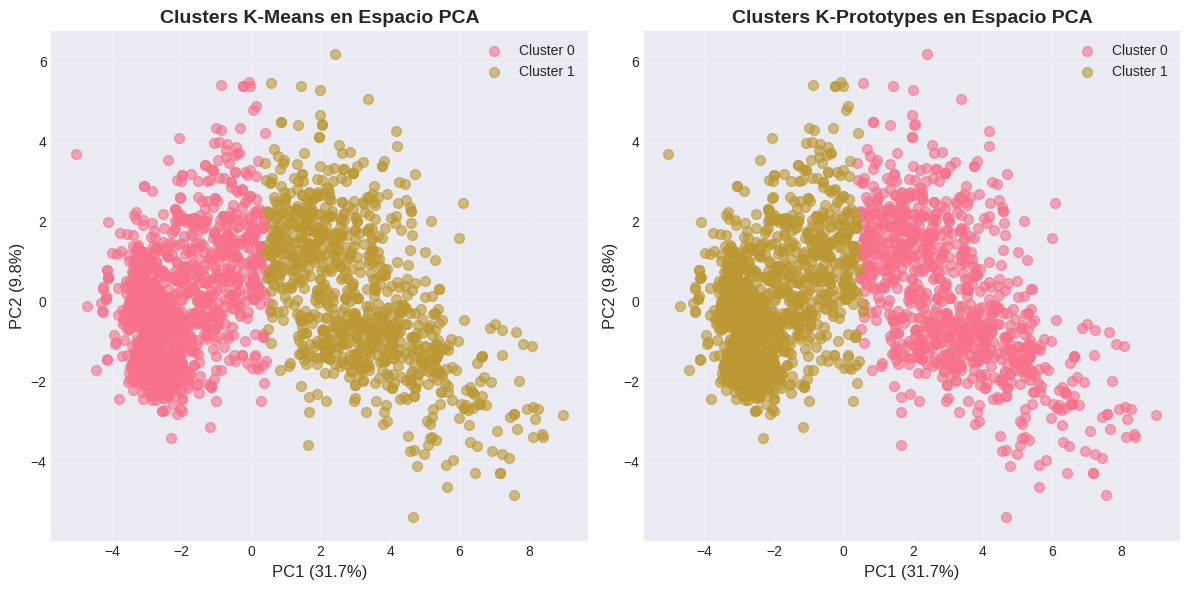

In [ ]:
# ============================================================================
# VISUALIZACIÓN PCA 2D - CLUSTERS
# ============================================================================
# Ahora que tenemos 2 dimensiones (PC1 y PC2), podemos hacer un gráfico de dispersión
# Cada punto es un cliente, coloreado según su cluster
# 
# ¿Qué buscamos ver?
# - Si los clusters están BIEN SEPARADOS: buenos clusters
# - Si los clusters se TRASLAPAN mucho: los clusters no son muy distintos
# ============================================================================

plt.figure(figsize=(12, 6))

# ============================================================================
# GRÁFICO 1: CLUSTERS DE K-MEANS EN ESPACIO PCA
# ============================================================================
plt.subplot(1, 2, 1)  # Primera de 2 gráficas (1 fila, 2 columnas, posición 1)

# Graficar cada cluster con un color diferente
for cluster in sorted(df_pca_2d['Cluster_KMeans'].unique()):
    # Filtrar datos del cluster
    cluster_data = df_pca_2d[df_pca_2d['Cluster_KMeans'] == cluster]
    
    # scatter() crea puntos en 2D:
    #   - x = PC1 (componente principal 1)
    #   - y = PC2 (componente principal 2)
    #   - cada cluster tiene un color diferente
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'],
                label=f'Cluster {cluster}', alpha=0.6, s=50)

plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)', fontsize=12)
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)', fontsize=12)
plt.title('Clusters K-Means en Espacio PCA', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# ============================================================================
# GRÁFICO 2: CLUSTERS DE K-PROTOTYPES EN ESPACIO PCA
# ============================================================================
plt.subplot(1, 2, 2)  # Segunda gráfica (posición 2)

for cluster in sorted(df_pca_2d['Cluster_KProto'].unique()):
    cluster_data = df_pca_2d[df_pca_2d['Cluster_KProto'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'],
                label=f'Cluster {cluster}', alpha=0.6, s=50)

plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)', fontsize=12)
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)', fontsize=12)
plt.title('Clusters K-Prototypes en Espacio PCA', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

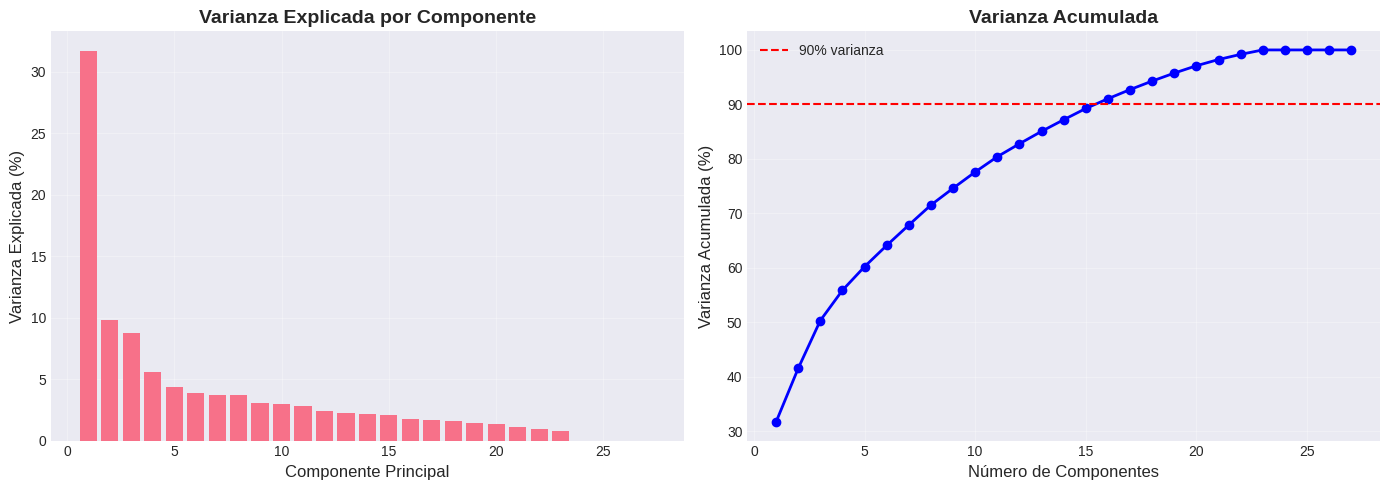


 Número de componentes para explicar 90% de varianza: 16
 Varianza explicada con 16 componentes: 91.04%


In [ ]:
# ============================================================================
# ANÁLISIS COMPLETO DE VARIANZA - ¿CUÁNTOS COMPONENTES NECESITAMOS?
# ============================================================================
# Pregunta: Si en lugar de 2 componentes usáramos 3, 4, 5... ¿cuántos
# componentes necesitaríamos para capturar el 90% de la información?
# ============================================================================

# Aplicar PCA con TODOS los componentes posibles (27)
pca_full = PCA(random_state=42)
pca_full.fit(X_kmeans_scaled)

# Calcular varianza acumulada
# np.cumsum() hace suma acumulativa: [0.4, 0.2, 0.15] -> [0.4, 0.6, 0.75]
varianza_acumulada = np.cumsum(pca_full.explained_variance_ratio_)

# ============================================================================
# VISUALIZACIÓN DE VARIANZA
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ============================================================================
# GRÁFICO 1: VARIANZA POR COMPONENTE INDIVIDUAL
# ============================================================================
# Muestra cuánta información aporta CADA componente principal
# Los primeros componentes suelen aportar más que los últimos
# ============================================================================

axes[0].bar(range(1, len(pca_full.explained_variance_ratio_) + 1),
            pca_full.explained_variance_ratio_ * 100)
axes[0].set_xlabel('Componente Principal', fontsize=12)
axes[0].set_ylabel('Varianza Explicada (%)', fontsize=12)
axes[0].set_title('Varianza Explicada por Componente', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# ============================================================================
# GRÁFICO 2: VARIANZA ACUMULADA
# ============================================================================
# Muestra el % TOTAL de información conforme agregamos más componentes
# La línea roja marca el 90% - objetivo común en análisis
# ============================================================================

axes[1].plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada * 100,
             'bo-', linewidth=2)
axes[1].axhline(y=90, color='r', linestyle='--', label='90% varianza')
axes[1].set_xlabel('Número de Componentes', fontsize=12)
axes[1].set_ylabel('Varianza Acumulada (%)', fontsize=12)
axes[1].set_title('Varianza Acumulada', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# CALCULAR CUÁNTOS COMPONENTES NECESITAMOS PARA 90% DE VARIANZA
# ============================================================================
# Esto responde: ¿Cuántas dimensiones mínimas necesito para no perder
# más del 10% de información?
# ============================================================================

# np.argmax() encuentra la primera posición donde varianza_acumulada >= 0.9
n_componentes_90 = np.argmax(varianza_acumulada >= 0.9) + 1

print(f"\n Número de componentes para explicar 90% de varianza: {n_componentes_90}")
print(f" Varianza explicada con {n_componentes_90} componentes: {varianza_acumulada[n_componentes_90-1]*100:.2f}%")
print(f"\n Interpretación:")
print(f"   - Tenemos 27 variables numéricas originales")
print(f"   - Con solo {n_componentes_90} componentes principales capturamos el 90% de la información")
print(f"   - Esto significa que podemos reducir la dimensionalidad de 27 a {n_componentes_90}")
print(f"     perdiendo solo un {100 - varianza_acumulada[n_componentes_90-1]*100:.2f}% de información")